In [1]:
#import relevant libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import pyspike as spk
 

# Set the random seed for data generation (just for test cases)

np.random.seed(42)

In [2]:
import sys 
sys.path.append("../") # go to parent dir
sys.path.append("../../") # go to parent dir

In [3]:
import utils.save_and_load_spike_data as sl

In [4]:
coupling_rs=['1', '1k','1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900',
             '2k', '2100', '2200', '2300', '2400', '2500', '2600', '2700', '2800', '2900', 
             '3k', '3100', '3200', '3300', '3400', '3500', '3600', '3700', '3800', '3900', 
             '4k', '4100', '4200', '4300', '4400', '4500', '4600', '4700', '4800', '4900',
             '5k', '7500', '10k', '12500', '15k', '17500', '20k', '1meg']
#coupling_rs=['1', '1k', '2500','5k', '7500', '10k', '12500', '15k', '17500', '20k', '1meg']
#coupling_rs=['1', '1k', '10k',  '20k', '1meg']

In [41]:
FOLDER= 'Same/'
coupling_r='1meg'

In [42]:
## Get the different distance measures

#set window
start=90.0
stop=180.0

#create empty lists to be filled with the values for the different distance measures 
isi_distances=[]
spike_distances=[]
spike_synchronies=[]

#for each different coupling resistance 
for coupling_r in coupling_rs:
    path = '../' + sl.PATH + FOLDER + 'fireflys100_' + coupling_r + 'OhmCouplingResistance' + sl.END
    data = sl.load_spike_data(path)
    #create list to be filled with spike_trains each one corresponding to one oscillator
    fireflies_spike_trains=[]
    
    for elem in data:

        spike_train = spk.SpikeTrain(elem, np.array([0.0, 180.0]))  #0.0 Start time, 180.0 End time from the Simulation
        fireflies_spike_trains.append(spike_train)
        
    #compute the distances provided by the functions by the PySpike package
    isi_dist = spk.isi_distance(fireflies_spike_trains, interval=(start, stop))
    isi_distances.append(isi_dist)
    spike_dist = spk.spike_distance(fireflies_spike_trains, interval=(start, stop))
    spike_distances.append(spike_dist)
    spike_sync = spk.spike_sync(fireflies_spike_trains, interval=(start, stop))
    spike_synchronies.append(spike_sync)
    

In [43]:
#ensure correct length -> just a sanity check
len(isi_distances)

49

In [45]:
#create x values just for plotting
x=list(range(1,len(isi_distances)+1))

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, coupling_rs, rotation='vertical')
plt.title("isi_distances")
plt.plot(x,isi_distances)

plt.subplot(1, 3, 2)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, coupling_rs, rotation='vertical')
plt.title("spike_distances")
plt.plot(x,spike_distances)

plt.subplot(1, 3, 3)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, coupling_rs, rotation='vertical')
plt.title("spike_synchronies")
plt.plot(x,spike_synchronies)


<IPython.core.display.Javascript object>

Test part of the notebook -> just for experimenting and understanding the package

In [6]:
path = '../' + sl.PATH + FOLDER + 'fireflys100_' + coupling_r + 'OhmCouplingResistance' + sl.END
data = sl.load_spike_data(path)

In [7]:
data.shape

(100, 185)

In [17]:
filter=data[0]<100
new_data=data[0][filter]
filter=new_data>10
new_data=new_data[filter]
new_data

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
fireflies_spike_trains=[]
for elem in data:
    spike_train = spk.SpikeTrain(elem, np.array([0.0, 180.0]))
    fireflies_spike_trains.append(spike_train)

In [66]:
len(fireflies_spike_trains)

100

Now we have data in the fireflies_spike_trains variable on which we can compute the distance measures

ISI distance: 0.00002161


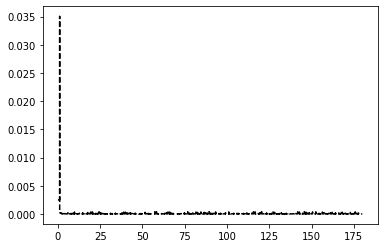

In [67]:
#isi profile is over time. Isi distance is the integration over time and taking the mean
isi_profile = spk.isi_profile(fireflies_spike_trains)
x, y = isi_profile.get_plottable_data()
plt.plot(x, y, '--k')
print("ISI distance: %.8f" % isi_profile.avrg())
plt.show()

In [68]:
#function just to get the distance
isi_dist = spk.isi_distance(fireflies_spike_trains)
print(isi_dist)

2.1609202030353922e-05


Use their test data

ISI distance: 0.13110637


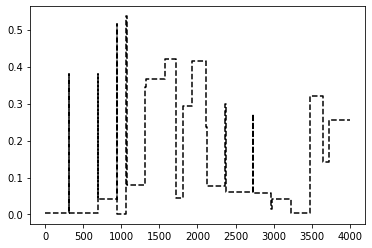

In [51]:
spike_trains = spk.load_spike_trains_from_txt("PySpike_testdata.txt",
                                              edges=(0, 4000))
isi_profile = spk.isi_profile(spike_trains[0], spike_trains[1])
x, y = isi_profile.get_plottable_data()
plt.plot(x, y, '--k')
print("ISI distance: %.8f" % isi_profile.avrg())
plt.show()

In [27]:
avrg_isi_profile = spk.isi_profile(spike_trains)
avrg_spike_profile = spk.spike_profile(spike_trains)
avrg_spike_sync_profile = spk.spike_sync_profile(spike_trains)

ISI distance: 0.17051817


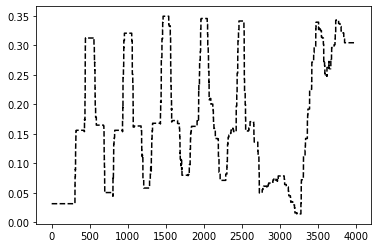

In [30]:
x, y = avrg_isi_profile.get_plottable_data()
plt.plot(x, y, '--k')
print("ISI distance: %.8f" % avrg_isi_profile.avrg())
plt.show()

In [25]:
type(spike_trains[0])

pyspike.SpikeTrain.SpikeTrain

In [17]:
np.array([0.1, 0.3, 0.45, 0.6, 0.9]), np.array([0.0, 1.0])

(array([0.1 , 0.3 , 0.45, 0.6 , 0.9 ]), array([0., 1.]))

In [18]:
spike_train = spk.SpikeTrain(np.array([0.1, 0.3, 0.45, 0.6, 0.9]), np.array([0.0, 1.0]))

In [20]:
spike_train0 = spk.SpikeTrain(data[0], np.array([0.0, 180.0]))
spike_train1 = spk.SpikeTrain(data[1], np.array([0.0, 180.0]))

In [26]:
type(spike_train0)

pyspike.SpikeTrain.SpikeTrain

ISI distance: 0.00485220


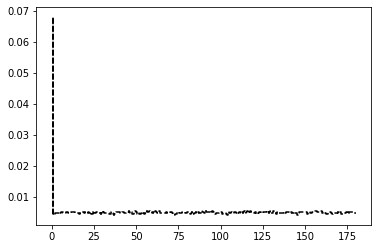

In [21]:
isi_profile = spk.isi_profile(spike_train0 , spike_train1)
x, y = isi_profile.get_plottable_data()
plt.plot(x, y, '--k')
print("ISI distance: %.8f" % isi_profile.avrg())
plt.show()